### Домашнее задание "Продвинутая линейная алгебра".  
**Уровень 0:**
`Придумайте матрицы, которые обладают следующими свойствами:`  
a) Диагональная, ортогональная, но не единичная(!)  
b) Верхнетреугольная, ортогональная  
c) Нижнетреугольная, ортогональная  
d) Матрица, у которой определитель = 1, и все элементы не равны 0  

*P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!*  

`Найдите собственные значения и собственные вектора матриц:`

m = np.array([[2, 2],
              [1, 3]])  

In [5]:
import numpy as np

In [6]:
# Диагональная, ортогональная, но не единичная
m0 = np.diag([1,2,3])
m0

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [7]:
# Верхнетреугольная, ортогональная
m1 = np.triu([[1,2,3],[4,5,6],[7,8,9]], 0)
m1

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [8]:
# Нижнетреугольная, ортогональная
m2 = np.tril([[1,2,3],[4,5,6],[7,8,9]], 0)
m2

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

In [9]:
# Матрица, у которой определитель = 1, и все элементы не равны 0
m3 = np.array([[2,1,2],
               [1,1,1],
               [2,1,3]])
det_m3 = np.linalg.det(m3)

In [10]:
print(det_m3)

1.0


In [89]:
# собственные значения и собственные вектора
m4 = np.array([[2, 2], [1, 3]], dtype=float)
print(m)

[[1 2]
 [2 3]]


In [90]:
w, v = np.linalg.eigh(m4)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.381966011250105
соответствующий ему собственный вектор [-0.85065081  0.52573111]
Собственное значение 3.618033988749895
соответствующий ему собственный вектор [0.52573111 0.85065081]


**Уровень 1:**
`Найдите спектральное разложение матрицы:`  
m = np.array([[1, 2],
              [2,3]])  

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

*У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.*  
`Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.`

In [105]:
# Найдите спектральное разложение матрицы
m = np.array([[1, 2], [2,3]])
w, v = np.linalg.eigh(m)
print(f'Собственное значение - {np.array(w, dtype=float)}')
print(f'Собственный вектор - \n{v}')

Собственное значение - [-0.23606798  4.23606798]
Собственный вектор - 
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


In [114]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [115]:
digits = load_digits()

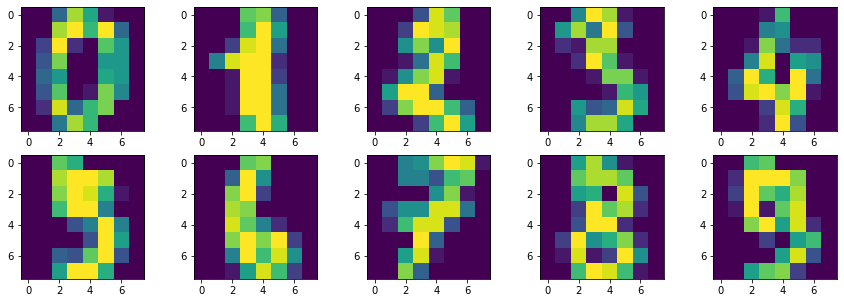

In [116]:
x = digits.data
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i,:].reshape([8,8]))

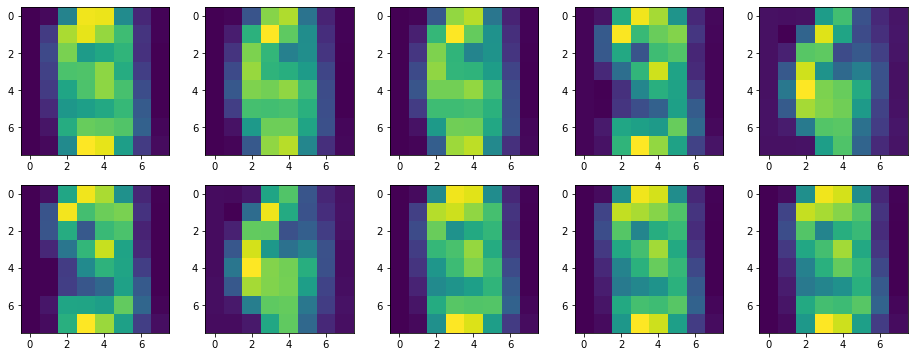

In [134]:
pca = PCA(n_components=1)
x_reduced = pca.fit_transform(x)
x1 = pca.inverse_transform(x_reduced)
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x1[i,:].reshape([8,8]))

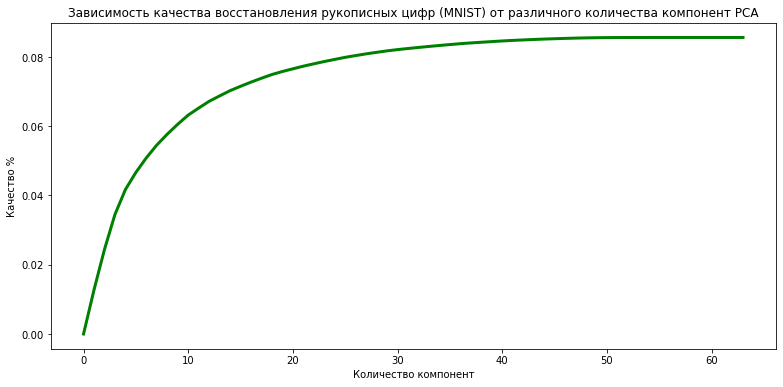

In [135]:
import pandas as pd
def mse(n):
    pca = PCA(n_components=n)
    x_reduced = pca.fit_transform(x)
    x1 = pca.inverse_transform(x_reduced)
    MSE = mean_squared_error(x, x1)
    return MSE

df = pd.DataFrame([mse(n) for n in range(64)])
df['quality'] = abs(((df[0]-df[0][0]))/(df[0][63]))/(10**30)
plt.figure(figsize=(13,6))
plt.plot(df['quality'], color='g', lw=3)
plt.title('Зависимость качества восстановления рукописных цифр (MNIST) от различного количества компонент PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Качество %')
plt.show()